In [1]:
#install.packages('NMF', repos='http://cran.us.r-project.org')
library('NMF')
source("https://bioconductor.org/biocLite.R")
biocLite("Biobase", "GEOquery")
library('GEOquery')

Loading required package: pkgmaker
Loading required package: registry

Attaching package: 'pkgmaker'

The following object is masked from 'package:base':

    isNamespaceLoaded

Loading required package: rngtools
Loading required package: cluster
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: windows] | Cores 3/4
Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) 'Biobase'
Warning message:
"package 'Biobase' is in use and will not be installed"Old packages: 'backports', 'broom', 'colorspace', 'data.table', 'digest',
  'forcats', 'GenomeInfoDb', 'ggplot2', 'jsonlite', 'Matrix', 'mgcv', 'nlme',
  'openssl', 'pbdZMQ', 'psych', 'Rcpp', 'rmarkdown', 'rprojroot',
  'rtracklayer', 'selectr', 'shiny', 'stringr', 'tidyr', 'tidyverse', 'xml2',
  'zoo'
Setting options('download.file.method.GEOquery'='auto')
Setting options('GEOquery.inm

In [3]:
gse <- getGEO('GSE21501', GSEMatrix=TRUE)

https://ftp.ncbi.nlm.nih.gov/geo/series/GSE21nnn/GSE21501/matrix/
OK
Found 1 file(s)
GSE21501_series_matrix.txt.gz
File stored at: 
C:\Users\mayars1\AppData\Local\Temp\RtmpoxGHai/GPL4133.soft
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"not all columns named in 'colClasses' exist"

In [4]:
show(gse)

$GSE21501_series_matrix.txt.gz
ExpressionSet (storageMode: lockedEnvironment)
assayData: 45220 features, 132 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM535948 GSM535949 ... GSM536949 (132 total)
  varLabels: title geo_accession ... data_row_count (48 total)
  varMetadata: labelDescription
featureData
  featureNames: 1 2 ... 45220 (45220 total)
  fvarLabels: ID COL ... ORDER (22 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
Annotation: GPL4133 



In [5]:
#Pull out ExpressionSet object

exprSetGSE <- gse[[1]]
dim(exprSetGSE)
class(exprSetGSE)

Features  Samples 
   45220      132

[1] "ExpressionSet"
attr(,"package")
[1] "Biobase"

In [6]:
#Adding 1 to all values to prevent negatives

nat <- exprs(exprSetGSE)
nat2 <- 2^nat
nat3 <- nat2 +1
nat4 <- log2(nat3)
head(nat4)

,GSM535948,GSM535949,GSM535950,GSM535951,GSM536032,GSM536033,GSM536034,GSM536035,GSM536036,GSM536037,...,GSM536940,GSM536941,GSM536942,GSM536943,GSM536944,GSM536945,GSM536946,GSM536947,GSM536948,GSM536949
1,2.0986104,1.5929736,2.0657654,1.9367518,3.0840305,1.4019698,2.4504991,1.6901235,2.5808569,1.7924373,...,1.8534091,0.9118681,1.6605868,1.1688542,1.5983266,1.1721886,1.9493306,1.2041725,2.0158068,1.3637457
2,0.7333574,0.8399929,1.0308224,0.9542492,1.0555292,1.4700461,0.9288461,0.5216308,0.5963851,0.5225417,...,1.1883918,1.0196318,0.6274911,1.0790539,0.4545549,0.7912074,1.2166653,0.1668406,0.6890023,0.9875542
3,0.5039829,0.9297959,1.0981256,0.9137435,1.0633318,0.8065142,0.6399327,1.2200867,0.6464072,1.0252166,...,1.0000000,1.4528507,1.2321097,0.5859632,1.0565673,0.7429692,1.7570503,1.2604537,0.7453872,1.4880015
4,0.8259570,1.0901518,1.1039977,0.8177058,1.0441557,0.8937276,0.6958637,1.5439266,0.9412473,0.7798712,...,1.0706494,0.7490254,1.1788759,1.6571702,1.5802996,0.7510524,0.7886776,0.5204183,0.6855914,1.0085250
5,0.8391105,0.8649771,1.0997250,1.0211528,0.9737434,1.2246580,0.4954929,1.2041725,0.8052302,1.0954633,...,1.0000000,0.2864171,0.8904994,0.8537570,0.7575671,1.0451862,0.2235326,0.6264337,0.5231497,1.0550104
6,0.6893821,0.9297959,0.9975022,0.9900347,1.1473307,1.0354245,0.4080790,0.8399929,0.8515259,1.2036066,...,0.8559925,0.6882432,1.4611154,0.8667822,1.1131137,0.4561789,0.7266069,1.2821247,0.5161930,0.1160140


In [56]:
"""
Nonnegative matrix factorization on dataset.

K = 14 (factors)
nrun = 10 (NMF will run ten times and select the run with the lowest loss value)


"""




res <- nmf(nat4, 14, nrun = 10, .opt = "v")

NMF algorithm: 'brunet'
Multiple runs: 10
Mode: parallel (3/4 core(s))


Runs: |==================================================| 100%
System time:
   user  system elapsed 
   1.08    0.40 4646.33 


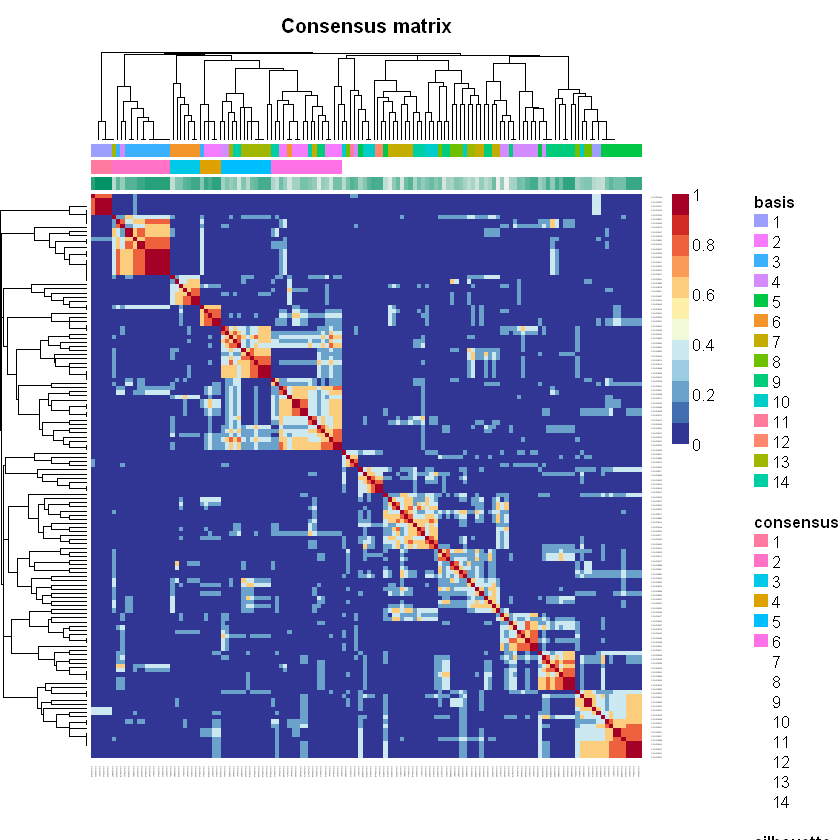

In [16]:
#Vaguely understand what I'm looking at.  No metric for what a "good" consensus looks like though.

consensusmap(res)

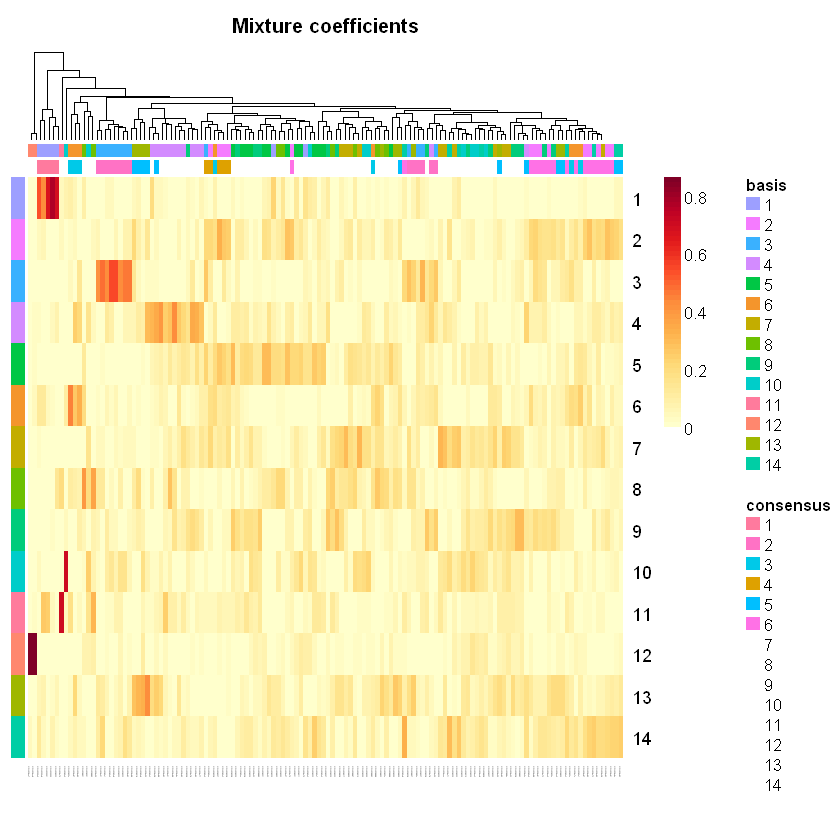

In [22]:
"""
This is moderately more informative.  Ideally sample of the same group (per phylo tree) would cluster on the same
factors (vertical axis).  Some of that is in evidence, but still not sure how much better it could be.
"""

coefmap(res)

In [ ]:
#Using result from previous nmf run to seed NMF to convergence with alternating least-squares solver.
#This takes a while to run.

res2 = nmf(nat4, 14, method="snmf/l", seed = res)

In [ ]:
"""
NMF factors matrix V into matrices W (weights) and H (basis).

In this case, S = W (sample loadings) and G = H (gene loadings).
"""

S <- coef(res2)
G <- basis(res2)

dim(S)
dim(G)

In [ ]:
"""
This part is tricky, and I couldn't find an R package to do it neatly.

From the paper: 
For each of the k factors, a set of distinct exemplar genes for the ith factor was established by ranking genes in 
descending order of the difference between the loading value in the ith column of matrix G and the largest 
loading value not in the ith column of matrix G.

2/20/17: After these operations, the 'top 50' in each column is logically mostly or entirely the genes that were '0'
in the basis matrix (G).  I think this means that descending order must be a typo, but I can't find another example of 
this process.

"""

gScaled <- scale(G, center = colMeans(G)-1, scale = FALSE)

colMax <- function(data) sapply(data, max, na.rm = TRUE)

In [ ]:
headers <- c("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N")

colnames(gScaled) <- headers

#colMax <- apply(gScaled,2,max)
nonColMax <- colMax

for(i in seq(from=1, to=14, by=1)){
    nonColMax[i] <- max(colMax[-i])
}

g3 <- gScaled

for(i in headers){
    g3[,i] <- g3[,i] - nonColMax[i]
}